# Axis Bank Stock-Stationarity

## Import Necessary Libraries

In [1]:
# Import required libraries
import yfinance as yf  
import datetime as dt  
import pandas as pd  
import matplotlib.pyplot as plt  
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import adfuller  
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  

## Stock Data Download

In [2]:
# Define the start and end dates for data download
start = dt.datetime(2021, 6, 1)
end = dt.datetime(2024, 11, 26)
symbol = 'AXISBANK.NS'

In [3]:
# Download historical stock data using yfinance
stk_data = yf.download(symbol, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [4]:
stk_data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AXISBANK.NS,AXISBANK.NS,AXISBANK.NS,AXISBANK.NS,AXISBANK.NS,AXISBANK.NS
Date,,,,,,
2021-06-01,741.917419,745.150024,754.000000,741.150024,753.549988,6660243
2021-06-02,733.802795,737.000000,745.299988,734.200012,744.799988,9973043
2021-06-03,747.393616,750.650024,752.250000,739.000000,743.000000,8170508
2021-06-04,738.830811,742.049988,759.900024,740.099976,751.000000,10336011
2021-06-07,747.841553,751.099976,753.950012,741.500000,743.099976,6986728
...,...,...,...,...,...,...
2024-11-18,1126.199951,1126.199951,1135.000000,1121.550049,1131.199951,9474971
2024-11-19,1133.949951,1133.949951,1139.000000,1122.050049,1130.000000,19225966


## Create a Continuous Date Range

In [5]:
# Create a date range with daily frequency
all_date = pd.date_range(start, end, freq='D')

In [6]:
all_date

DatetimeIndex(['2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04',
               '2021-06-05', '2021-06-06', '2021-06-07', '2021-06-08',
               '2021-06-09', '2021-06-10',
               ...
               '2024-11-17', '2024-11-18', '2024-11-19', '2024-11-20',
               '2024-11-21', '2024-11-22', '2024-11-23', '2024-11-24',
               '2024-11-25', '2024-11-26'],
              dtype='datetime64[ns]', length=1275, freq='D')

In [7]:
# Reindex stock data to the continuous date range and forward-fill missing values
dummyDate = stk_data.reindex(all_date).fillna(method='ffill')

C:\Users\saran\AppData\Local\Temp\ipykernel_30176\2710158245.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dummyDate = stk_data.reindex(all_date).fillna(method='ffill')


In [8]:
dummyDate

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AXISBANK.NS,AXISBANK.NS,AXISBANK.NS,AXISBANK.NS,AXISBANK.NS,AXISBANK.NS
2021-06-01,741.917419,745.150024,754.000000,741.150024,753.549988,6660243.0
2021-06-02,733.802795,737.000000,745.299988,734.200012,744.799988,9973043.0
2021-06-03,747.393616,750.650024,752.250000,739.000000,743.000000,8170508.0
2021-06-04,738.830811,742.049988,759.900024,740.099976,751.000000,10336011.0
2021-06-05,738.830811,742.049988,759.900024,740.099976,751.000000,10336011.0
...,...,...,...,...,...,...
2024-11-22,1142.400024,1142.400024,1147.900024,1127.550049,1136.650024,16687505.0
2024-11-23,1142.400024,1142.400024,1147.900024,1127.550049,1136.650024,16687505.0
2024-11-24,1142.400024,1142.400024,1147.900024,1127.550049,1136.650024,16687505.0


## Plot the Original Close Prices

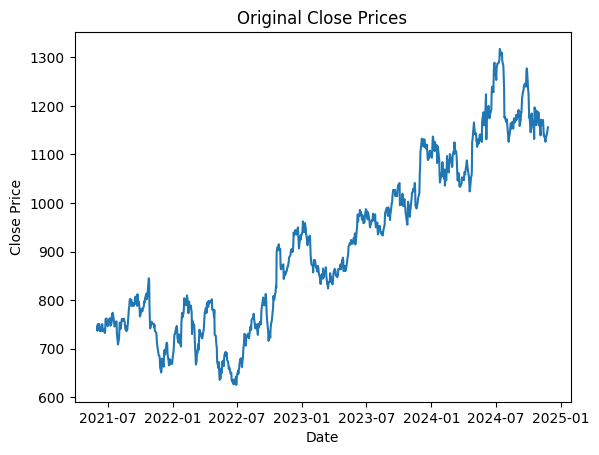

In [9]:
# Plot the original 'Close' prices
plt.plot(stk_data["Close"])
plt.title("Original Close Prices")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

## Decompose the Time Series (Multiplicative and Additive)

<Figure size 1600x500 with 0 Axes>

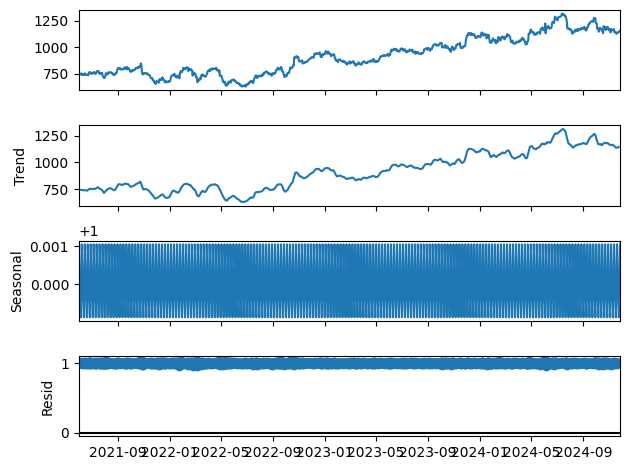

In [10]:
# Multiplicative decomposition
result = seasonal_decompose(dummyDate["Close"], model='multiplicative')
plt.figure(figsize=(16, 5))
result.plot()
plt.show()

<Figure size 1600x500 with 0 Axes>

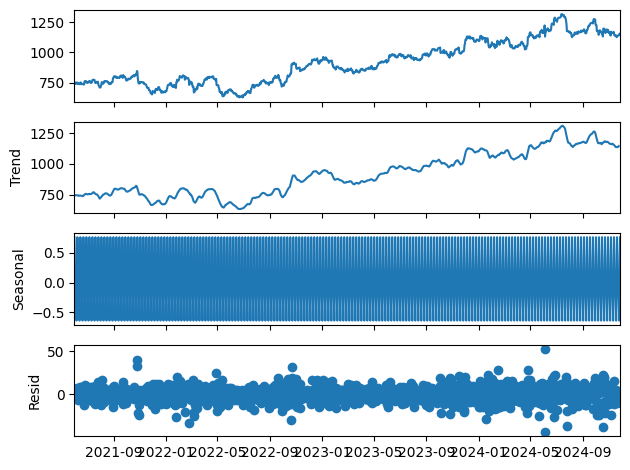

In [11]:
# Additive decomposition
result = seasonal_decompose(dummyDate["Close"], model='additive')
plt.figure(figsize=(16, 5))
result.plot()
plt.show()

## Plot Original Data to Observe Non-Stationarity

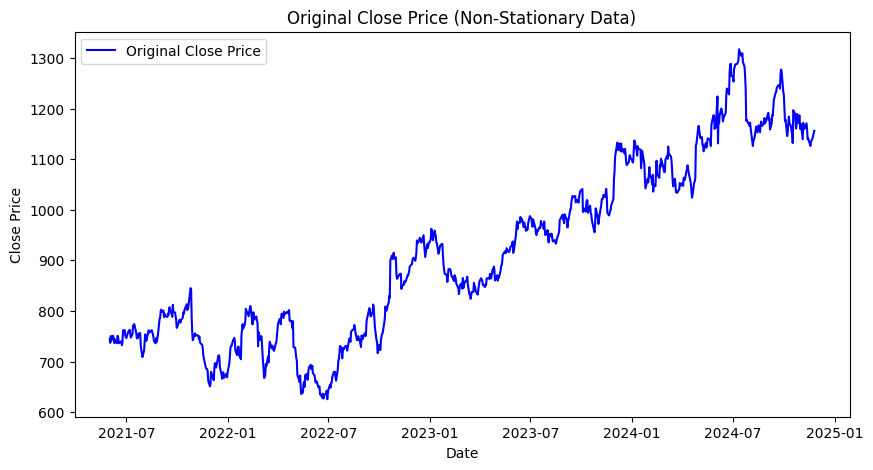

In [12]:
# Plot the original data to observe non-stationarity
plt.figure(figsize=(10, 5))
plt.plot(stk_data['Close'], label='Original Close Price', color='blue')
plt.title("Original Close Price (Non-Stationary Data)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

## Perform Augmented Dickey-Fuller (ADF) Test

In [13]:
# Check stationarity using Augmented Dickey-Fuller test
result = adfuller(stk_data['Close'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] > 0.05:
    print("Data is non-stationary. Applying differencing...")


ADF Statistic: -0.9717713349106785
p-value: 0.7634203434834361
Data is non-stationary. Applying differencing...


## Apply First Differencing

In [14]:
# Apply first differencing
stk_data['Close_diff'] = stk_data['Close'].diff()

In [15]:
stk_data['Close_diff']

Date
2021-06-01          NaN
2021-06-02    -8.150024
2021-06-03    13.650024
2021-06-04    -8.600037
2021-06-07     9.049988
                ...    
2024-11-18   -14.500000
2024-11-19     7.750000
2024-11-21     5.200073
2024-11-22     3.250000
2024-11-25    13.500000
Name: Close_diff, Length: 862, dtype: float64

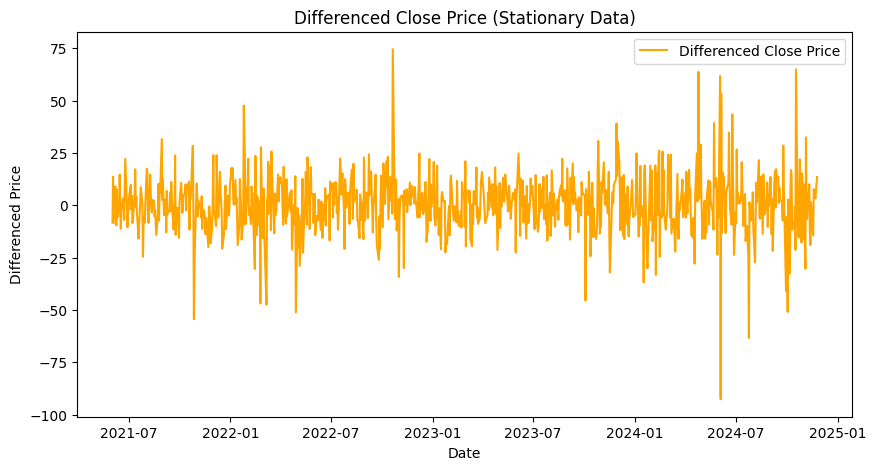

In [16]:
# Plot the differenced data
plt.figure(figsize=(10, 5))
plt.plot(stk_data['Close_diff'], label='Differenced Close Price', color='orange')
plt.title("Differenced Close Price (Stationary Data)")
plt.xlabel("Date")
plt.ylabel("Differenced Price")
plt.legend()
plt.show()

##  Recheck Stationarity After Differencing

In [17]:
# Check stationarity again
result_diff = adfuller(stk_data['Close_diff'].dropna())
print("ADF Statistic after differencing:", result_diff[0])
print("p-value after differencing:", result_diff[1])
if result_diff[1] < 0.05:
    print("Data is now stationary.")


ADF Statistic after differencing: -16.99793245966038
p-value after differencing: 8.771666860127546e-30
Data is now stationary.


##  Plot ACF and PACF for Original Data

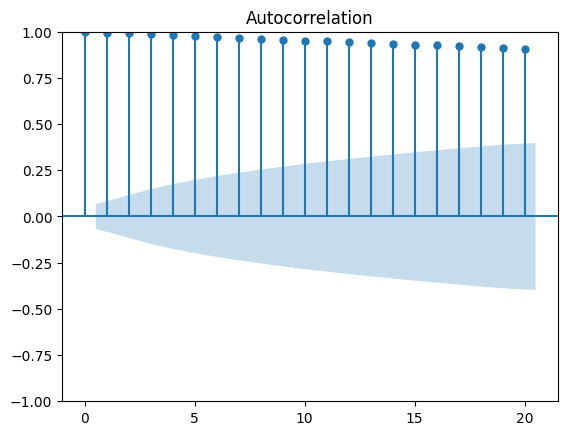

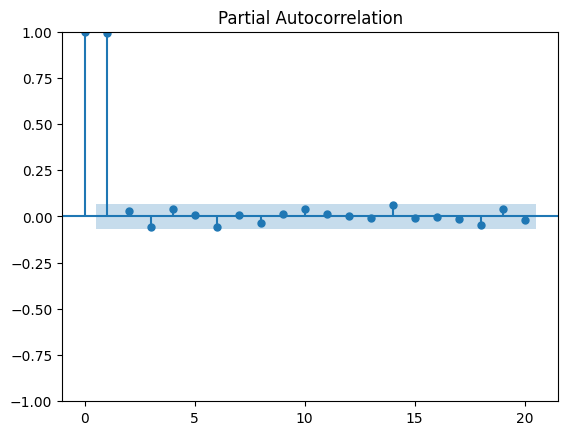

In [18]:
# Plot ACF and PACF for original data
plot_acf(stk_data['Close'].dropna(), lags=20)
plot_pacf(stk_data['Close'].dropna(), lags=20)
plt.show()

## Plot ACF and PACF for Differenced Data

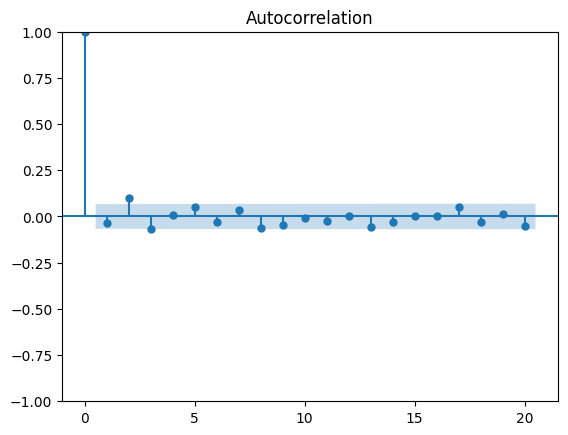

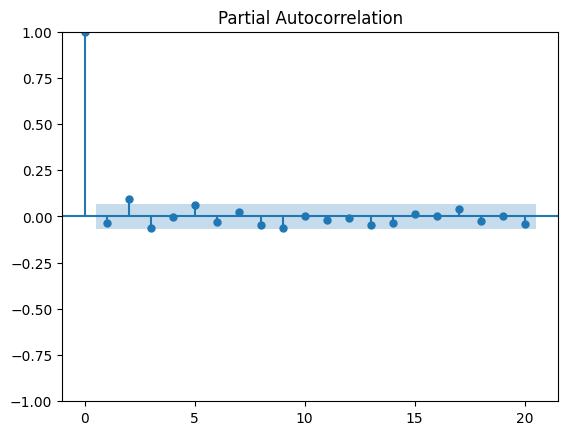

In [19]:
# Plot ACF and PACF for differenced data
plot_acf(stk_data['Close_diff'].dropna(), lags=20)
plot_pacf(stk_data['Close_diff'].dropna(), lags=20)
plt.show()